In [4]:
import numpy as np 
import matplotlib.pyplot as plt
import jax.numpy as jnp
from jax import vmap
import matplotlib.pyplot as plt
from matplotlib. collections import PatchCollection
import sys 
sys.path.append('../../../')
sys.path.append('../../')
sys.path.append('../')
from build_solver import build_inspection_erg_time_opt_solver

import dill as pkl



In [5]:
args = {
    'N' : 100, 
    'x0' : np.array([0.0, 0.0]),
    'xf' : np.array([0.0, 0.0]),
    'erg_ub' : 0.001,
    'alpha' : 0.9,
    'wrksp_bnds' : np.array([[-np.pi/4, np.pi/4],[-np.pi/4,np.pi/4]])
}

In [6]:
solver = build_inspection_erg_time_opt_solver(args)
solver.solve(max_iter=20_000, eps=1e-6, alpha=1.0001)

I0000 00:00:1704312528.444190       1 tfrt_cpu_pjrt_client.cc:349] TfrtCpuClient created.


done in  11104  iterations


(-0.781642597913742,
 0.7945809185504913,
 -0.795890462398529,
 0.7803330540657043)

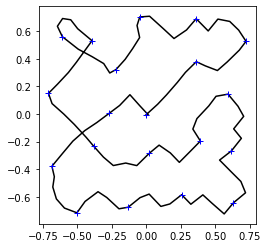

In [7]:
sol = solver.get_solution()

fig, ax = plt.subplots() 

ax.plot(sol['x'][:,0], sol['x'][:,1],'k')
ax.plot(sol['x'][::5,0], sol['x'][::5,1],'b+')


ax.axis('square')
# ax.set_xlim(0,100)
# ax.set_ylim(0,100)
# plt.savefig('scaled_search_forest.pdf')


In [8]:
file = open('./../data/inspection_sol.pkl', 'wb')
pkl.dump(sol, file)
file.close()

# file = open('./data/obs_loc.pkl', 'wb')
# pkl.dump(obs, file)
# file.close()


In [32]:
# obs = pkl.load(open('./data/obs_loc.pkl', 'rb'))

In [9]:
sol['tf']

Array(3.924311, dtype=float32, weak_type=True)